In [4]:
!pip install numpy pandas matplotlib seaborn scikit-learn

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp312-cp312-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached matplotlib-3.10.1-

## Crearemos una funcion senoidal para entrenar al modelo LSTM

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

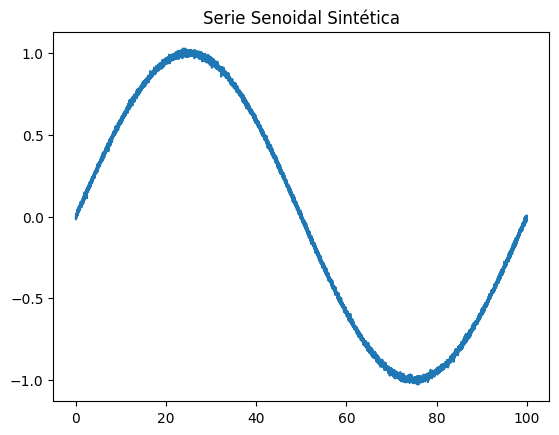

In [11]:
# Parámetros de la serie
t = np.linspace(0, 100, 10000)
f=100 # Frecuencia de la serie
w = 2*np.pi*f
serie = np.sin(w*t) + 0.01 * np.random.randn(len(t))

# Visualización rápida
plt.plot(t, serie)
plt.title("Serie Senoidal Sintética")
plt.show()


##  Preparar secuencias para el modelo

In [12]:
def crear_dataset(serie, ventana):
    X, y = [], []
    for i in range(len(serie) - ventana):
        X.append(serie[i : i + ventana])
        y.append(serie[i + ventana])
    X = np.array(X)[:, :, np.newaxis]  # reshape a (n_samples, ventana, 1)
    y = np.array(y)
    return X, y

ventana = 50
X, y = crear_dataset(serie, ventana)

# Divide en entrenamiento y validación
split = int(len(X) * 0.8)
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]


In [15]:
y_train[0]

np.float64(0.03964838025324919)

## Definir la arquitectura LSTM

In [16]:
model = models.Sequential([
    layers.LSTM(64, input_shape=(ventana, 1), return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(32),
    layers.Dense(1)
])

model.summary()


d:\Documents\codigos_varios\tfgpu-env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

### Compilar el modelo
- MSE (error cuadrático medio) es común para regresión de series.
- MAE (error absoluto medio) como métrica adicional.

In [18]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


### Entrenar el modelo

In [21]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 2.1160e-04 - mae: 0.0116 - val_loss: 1.9334e-04 - val_mae: 0.0112
Epoch 2/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 2.1523e-04 - mae: 0.0117 - val_loss: 3.5878e-04 - val_mae: 0.0164
Epoch 3/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.9992e-04 - mae: 0.0112 - val_loss: 2.0723e-04 - val_mae: 0.0119
Epoch 4/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 2.2909e-04 - mae: 0.0120 - val_loss: 1.8572e-04 - val_mae: 0.0111
Epoch 5/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 2.1082e-04 - mae: 0.0115 - val_loss: 4.5488e-04 - val_mae: 0.0188
Epoch 6/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 2.0278e-04 - mae: 0.0114 - val_loss: 1.2745e-04 - val_mae: 0.0091
Epoch 7/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 2.1575e-04 - mae: 0.0117 - val_loss: 1.0923e-04 - val_mae: 0.0084
Epoch 8/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 1.9656e-04 - mae: 0.0112 - val_loss: 1.2321e-04 - 

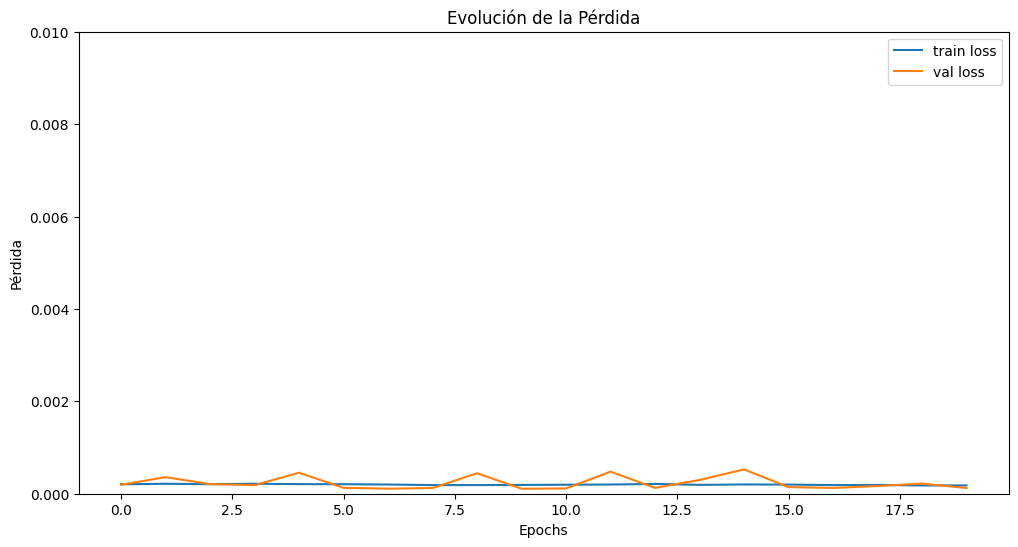

In [27]:
# Se Puede monitorizar la evolución de loss y val_loss:

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Evolución de la Pérdida")
plt.xlabel("Epochs")
plt.ylabel("Pérdida")
plt.ylim(0, 0.01)
plt.legend()


###  Evaluación y predicción

In [24]:
loss, mae = model.evaluate(X_val, y_val)
print(f"Validación — MSE: {loss:.4f}, MAE: {mae:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1360e-04 - mae: 0.0086
Validación — MSE: 0.0001, MAE: 0.0090


Realizar predicciones:

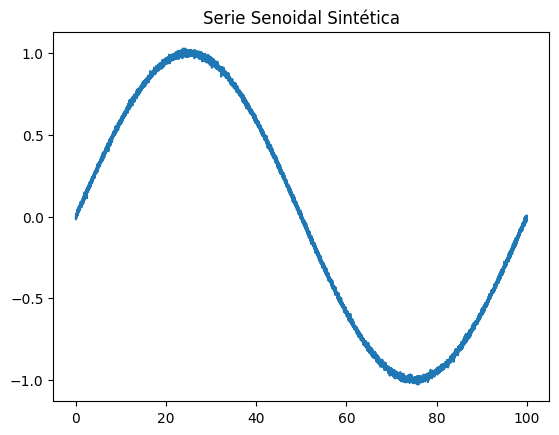

In [ ]:
# Visualización rápida recordatorio de la señal senoidal
t = np.linspace(0, 100, 10000)
plt.plot(t, serie)
plt.title("Serie Senoidal Sintética")
plt.show()

In [32]:
X_val, X_val.shape

(array([[[-0.95085916],
         [-0.96645467],
         [-0.95836114],
         ...,
         [-0.96000036],
         [-0.93765526],
         [-0.95779928]],
 
        [[-0.96645467],
         [-0.95836114],
         [-0.95571763],
         ...,
         [-0.93765526],
         [-0.95779928],
         [-0.95232635]],
 
        [[-0.95836114],
         [-0.95571763],
         [-0.96167608],
         ...,
         [-0.95779928],
         [-0.95232635],
         [-0.94384721]],
 
        ...,
 
        [[-0.03109995],
         [-0.03096252],
         [-0.036414  ],
         ...,
         [-0.00894125],
         [-0.00470355],
         [-0.00609449]],
 
        [[-0.03096252],
         [-0.036414  ],
         [-0.02515862],
         ...,
         [-0.00470355],
         [-0.00609449],
         [-0.00412645]],
 
        [[-0.036414  ],
         [-0.02515862],
         [-0.01785055],
         ...,
         [-0.00609449],
         [-0.00412645],
         [ 0.00696259]]]),
 (1990, 50, 1))

In [33]:
y_val, y_val.shape

(array([-0.95232635, -0.94384721, -0.93428079, ..., -0.00412645,
         0.00696259,  0.00170242]),
 (1990,))

In [34]:
predicciones = model.predict(X_val)

predicciones, predicciones.shape

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


(array([[-9.4523680e-01],
        [-9.4512993e-01],
        [-9.4503337e-01],
        ...,
        [ 4.9890019e-04],
        [ 9.1127120e-04],
        [ 1.8272400e-03]], dtype=float32),
 (1990, 1))

In [ ]:
# Gráfica de predicción vs real
plt.plot(y_val, label='Real')
plt.plot(predicciones, label='Predicción')
plt.legend()
plt.show()

Save model

In [35]:
model.save('lstm_model.h5')